In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.layers import Flatten

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from keras.constraints import maxnorm
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import time
import warnings
warnings.filterwarnings("ignore")
import pickle

In [3]:
# path = '/content/drive/MyDrive/final_tidy_reddits_lemmetized.json'
# df = pd.read_json(path, orient='table')
path = './final_tidy_reddits_lemmetized.csv'
df = pd.read_csv(path)

In [4]:
df.shape

(115033, 5)

In [5]:
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None

In [6]:
df.sample(7)

,Unnamed: 0,label,text,lemmatized,tokens_back_to_text
58947,58947,depression,"['always', 'behind', 'school', 'understand', 'basic', 'math', 'instructions', 'ca', 'bothered', 'better', 'since', 'already', 'far', 'behind', 'understand', 'anything', 'school', 'tried', 'would', 'time', 'consuming', 'missed', 'much', 'always', 'bad', 'grades', 'gotten', 'worse', 'around', 'grade', 'due', 'bullying', 'would', 'miss', 'lot', 'school', 'middle', 'school', 'harassment', 'continuous', 'bullying', 'friends', 'also', 'trying', 'lose', 'weight', 'keto', 'midst', 'even', 'learned', 'drive', 'yet', 'part', 'time', 'job', 'either', 'parents', 'divorcing', 'ca', 'afford', 'move', 'dad', 'parents', 'live', 'roof', 'job', 'live', 'crummy', 'neighborhood', 'everything', 'wreck', 'unmotivated', 'relearn', 'chinese', 'croatian', 'ca', 'bothered', 'something', 'messy', 'home', 'room', 'fairly', 'clean', 'family', 'messy', 'lack', 'social', 'skills', 'handwriting', 'shit', 'sound', 'like', 'toddler', 'speak', 'know', 'even', 'go', 'college', 'grades', 'terrible', 'would', 'college', 'consider', 'feel', 'like', 'behind', 'life', 'think', 'ever', 'get', 'back', 'track']","['always', 'behind', 'school', 'understand', 'basic', 'math', 'instruction', 'ca', 'bother', 'well', 'since', 'already', 'far', 'behind', 'understand', 'anything', 'school', 'try', 'would', 'time', 'consume', 'miss', 'much', 'always', 'bad', 'grade', 'gotten', 'bad', 'around', 'grade', 'due', 'bullying', 'would', 'miss', 'lot', 'school', 'middle', 'school', 'harassment', 'continuous', 'bullying', 'friend', 'also', 'try', 'lose', 'weight', 'keto', 'midst', 'even', 'learn', 'drive', 'yet', 'part', 'time', 'job', 'either', 'parent', 'divorce', 'ca', 'afford', 'move', 'dad', 'parent', 'live', 'roof', 'job', 'live', 'crummy', 'neighborhood', 'everything', 'wreck', 'unmotivated', 'relearn', 'chinese', 'croatian', 'ca', 'bother', 'something', 'messy', 'home', 'room', 'fairly', 'clean', 'family', 'messy', 'lack', 'social', 'skill', 'handwrite', 'shit', 'sound', 'like', 'toddler', 'speak', 'know', 'even', 'go', 'college', 'grade', 'terrible', 'would', 'college', 'consider', 'feel', 'like', 'behind', 'life', 'think', 'ever', 'get', 'back', 'track']",always behind school understand basic math instruction ca bother well since already far behind understand anything school try would time consume miss much always bad grade gotten bad around grade due bullying would miss lot school middle school harassment continuous bullying friend also try lose weight keto midst even learn drive yet part time job either parent divorce ca afford move dad parent live roof job live crummy neighborhood everything wreck unmotivated relearn chinese croatian ca bother something messy home room fairly clean family messy lack social skill handwrite shit sound like toddler speak know even go college grade terrible would college consider feel like behind life think ever get back track
113471,113471,depression,"['im', 'point', 'illness', 'look', 'computer', 'longer', 'im', 'research', 'assistant', 'work', 'computer', 'based', 'write', 'papers', 'input', 'data', 'things', 'like', 'ive', 'meltdowns', 'personal', 'situations', 'hit', 'constantly', 'motivation', 'write', 'desire', 'work', 'dont', 'want', 'eat', 'want', 'sleep', 'im', 'really', 'point', 'either', 'quitting', 'job', 'ending', 'work', 'meet', 'deadlines', 'stop', 'feeling', 'way', 'help', 'work']","['im', 'point', 'illness', 'look', 'computer', 'longer', 'im', 'research', 'assistant', 'work', 'computer', 'base', 'write', 'paper', 'input', 'data', 'thing', 'like', 'ive', 'meltdown', 'personal', 'situation', 'hit', 'constantly', 'motivation', 'write', 'desire', 'work', 'dont', 'want', 'eat', 'want', 'sleep', 'im', 'really', 'point', 'either', 'quit', 'job', 'end', 'work', 'meet', 'deadline', 'stop', 'feel', 'way', 'help', 'work']",im point illness look computer longer im research assistant work computer base write paper input data thing like ive meltdown personal situa

In [7]:
df.isna().sum()

Unnamed: 0             0
label                  0
text                   0
lemmatized             0
tokens_back_to_text    6
dtype: int64

In [8]:
reddits = list(df['tokens_back_to_text'])
type(reddits)

list

In [9]:
len(reddits)

115033

In [10]:
df['label'].value_counts()

depression    69217
Anxiety       36257
bipolar        9559
Name: label, dtype: int64

In [11]:
df['label'] = np.where(df['label']=='bipolar',1,0)

In [12]:
df.head(3)

,Unnamed: 0,label,text,lemmatized,tokens_back_to_text
0,0,0,"['smirk', 'face', 'like', 'im', 'high', 'feel', 'pretty', 'good', 'longer', 'feel', 'anxious', 'im', 'peering', 'behind', 'back', 'every', 'second', 'didnt', 'expect', 'feel', 'good', 'anyone', 'ideas', 'propranolol', 'making', 'feel', 'somewhat', 'high']","['smirk', 'face', 'like', 'im', 'high', 'feel', 'pretty', 'good', 'longer', 'feel', 'anxious', 'im', 'peer', 'behind', 'back', 'every', 'second', 'didnt', 'expect', 'feel', 'good', 'anyone', 'idea', 'propranolol', 'make', 'feel', 'somewhat', 'high']",smirk face like im high feel pretty good longer feel anxious im peer behind back every second didnt expect feel good anyone idea propranolol make feel somewhat high
1,1,0,"['minutes', 'ago', 'posted', 'something', 'another', 'subreddit', 'convince', 'minutes', 'good', 'post', 'finally', 'posted', 'suddenly', 'got', 'anxious', 'like', 'anxious', 'could', 'hear', 'heart', 'beating', 'started', 'breath', 'faster', 'etc', 'end', 'deleted', 'post', 'happened', 'many', 'times', 'often', 'writing', 'something', 'group', 'chats', 'strangers', 'discord', 'generally', 'posting', 'comment', 'social', 'media', 'commenting', 'friends', 'post', 'sth', 'like', 'even', 'chatting', 'people', 'online', 'makes', 'uncomfortable', 'think', 'might', 'react', 'way', 'might', 'afraid', 'rejection', 'feeling', 'left', 'someone', 'responding', 'liking', 'confuses', 'feel', 'way', 'irl', 'good', 'friends', 'never', 'dealt', 'rejection', 'since', 'sociable', 'also', 'dont', 'really', 'care', 'people', 'think', 'reason', 'really', 'seems', 'bother', 'particular', 'situations', 'anyone', 'advice', 'overcome', 'fear', 'btw', 'dont', 'feel', 'way', 'asking', 'help', 'like', 'right', 'diagnosed', 'anxiety', 'disorder', 'think', 'one', 'either', 'looking', 'advice', 'subreddit', 'anxious', 'posting', 'reddit', 'group', 'chats']","['minute', 'ago', 'post', 'something', 'another', 'subreddit', 'convince', 'minute', 'good', 'post', 'finally', 'post', 'suddenly', 'get', 'anxious', 'like', 'anxious', 'could', 'hear', 'heart', 'beating', 'start', 'breath', 'faster', 'etc', 'end', 'delete', 'post', 'happen', 'many', 'time', 'often', 'write', 'something', 'group', 'chat', 'stranger', 'discord', 'generally', 'post', 'comment', 'social', 'medium', 'comment', 'friend', 'post', 'sth', 'like', 'even', 'chat', 'people', 'online', 'make', 'uncomfortable', 'think', 'might', 'react', 'way', 'might', 'afraid', 'rejection', 'feel', 'left', 'someone', 'respond', 'like', 'confuses', 'feel', 'way', 'irl', 'good', 'friend', 'never', 'dealt', 'rejection', 'since', 'sociable', 'also', 'dont', 'really', 'care', 'people', 'think', 'reason', 'really', 'seem', 'bother', 'particular', 'situation', 'anyone', 'advice', 'overcome', 'fear', 'btw', 'dont', 'feel', 'way', 'ask', 'help', 'like', 'right', 'diagnose', 'anxiety', 'disorder', 'think', 'one', 'either', 'look', 'advice', 'subreddit', 'anxious', 'post', 'reddit', 'group', 'chat']",minute ago post something another subreddit convince minute good post finally post suddenly get anxious like anxious could hear heart beating start breath faster etc end delete post happen many time often write something group chat stranger discord generally post comment social medium comment friend post sth like even chat people online make uncomfortable think might react way might afraid rejection feel left someone respond like confuses feel way irl good friend never dealt rejection since sociable also dont really care people think reason really seem bother particular situation anyone advice overcome fear btw dont feel way ask help like right diagnose anxiety disorder think one either look advice subreddit anxious post reddit group chat
2,2,0,"['feel', 'anxious', 'college', 'body', 'started', 'showing', 'signs', 'heat', 'chest', 'think', 'lot', 'makes', 'anxious', 'afraid', 'go', 'college', 'especially', 'pandemic', 'need', 'group', 'fit', 'feel', 'anxious', 'college']","['feel', 'anxious', 'college

In [13]:
df['label'].value_counts()

0    105474
1      9559
Name: label, dtype: int64

## **Feature extraction**

In [15]:
# prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([str(x) for x in reddits])

In [16]:
word_index = tokenizer.word_index
print('WE HAVE %s UNIQUE TOKENS.' % len(word_index))

WE HAVE 57670 UNIQUE TOKENS.


In [17]:
sequences = tokenizer.texts_to_sequences([str(x) for x in reddits])

In [18]:
with open('bipolar.sequences.pkl', 'wb') as f:
    pickle.dump(sequences, f, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
# pad redddits to a max length of 150 words
maxlen = 150
X = pad_sequences(sequences, maxlen = maxlen)
X.shape

(115033, 150)

In [20]:
y = df['label']

##Split the dataset into **training** and **test** sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92026, 150), (23007, 150), (92026,), (23007,))

In [23]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

# Defining the **Convolutional Neural Network Model**

In [24]:
# Prepare hyperparameters of CNN
vocab_size = len(word_index) + 1
# output_dim = 32

In [25]:
# Building the CNN Model
model = Sequential()

model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())

model.add(Dense(250, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

### Visualizing the CNN Model

In [26]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          7381888   
                                                                 
 conv1d (Conv1D)             (None, 150, 128)          49280     
                                                                 
 conv1d_1 (Conv1D)           (None, 150, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 75, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4800)              0         
                                                                 
 dense (Dense)               (None, 250)               1200250   
                                                        

### Using the **Adam optimizer** for the optimization and **Binary cross entropy** to calculate the Loss Function

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
start = time.time()

# fit the model to the training set
cnn_hist = model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

# evaluation of the model on the test set
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))
warnings.filterwarnings("ignore")

end = time.time()
total = (end-start) // 60
print('Training duration : {} minutes'.format(total))

Epoch 1/5
2301/2301 [==============================] - 579s 251ms/step - loss: 0.1403 - accuracy: 0.9575 - val_loss: 0.1221 - val_accuracy: 0.9641
Epoch 2/5
2301/2301 [==============================] - 964s 419ms/step - loss: 0.0938 - accuracy: 0.9706 - val_loss: 0.1250 - val_accuracy: 0.9646
Epoch 3/5
2301/2301 [==============================] - 940s 409ms/step - loss: 0.0592 - accuracy: 0.9806 - val_loss: 0.1599 - val_accuracy: 0.9552
Epoch 4/5
2301/2301 [==============================] - 999s 434ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.2025 - val_accuracy: 0.9530
Epoch 5/5
2301/2301 [==============================] - 1056s 459ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.3245 - val_accuracy: 0.9549
Accuracy: 95.51%
Training duration : 77.0 minutes


In [30]:
history_dict = cnn_hist.history

## **Plotting the loss and the accuracy of both training and validation sets using the model history**

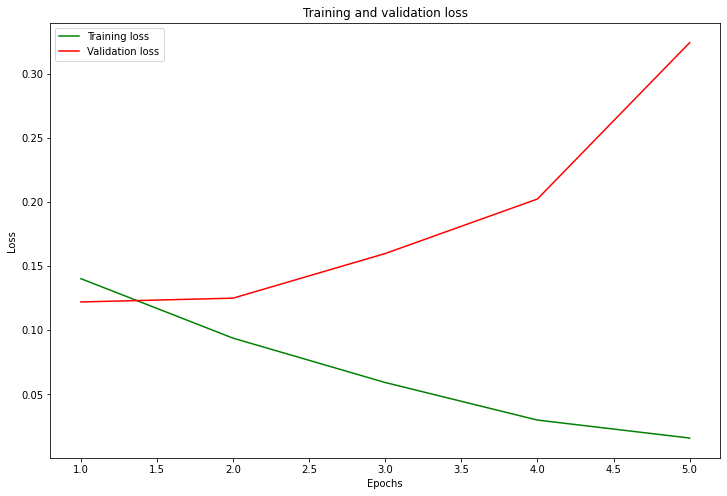

In [31]:
# loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 

# plot
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss_values, 'green',label='Training loss')
plt.plot(epochs, val_loss_values, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

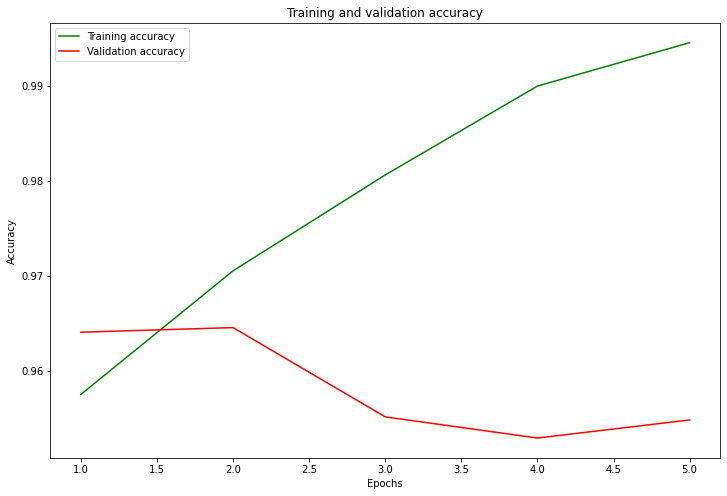

In [32]:
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'green',label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Confusion matrix**

In [33]:
preds = np.round(model.predict(X_test), 0)

719/719 [==============================] - 59s 80ms/step


In [34]:
cm = confusion_matrix(y_test, preds)

In [35]:
df_cm = pd.DataFrame(cm, index = ["depression", "non-depression"], columns = ["depression", "non-depression"])

Text(30.499999999999993, 0.5, 'Predicted Class')

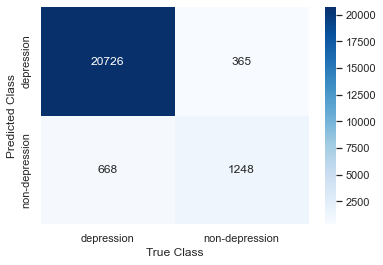

In [36]:
plt.figure(figsize=(6, 4))
sb.set_theme()
sb.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [38]:
with open('bipolar.model.pkl', 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: ram://48efd1d0-40de-41e9-a94d-8b441d81e54d/assets


INFO:tensorflow:Assets written to: ram://48efd1d0-40de-41e9-a94d-8b441d81e54d/assets
